Differential Equations with more than One Variable
--------------------------------------------------

So far we have been considering ordinary differential equations with strictly one independent variable $x$, 
which depended on an independent time variable $t$.  For the single variable case, we 
have some equation $f(x, t)$ which is description of the
rate of change of the variable $x$ given the current value of $x$ and the value of the independent variable $t$.

In many problems, however, we have more than 1 dependent variable.  That is to say, we have *simultaneous differential equations*,
where the derivative of each dependent variable can depend on any or all of the variables, as well as on the independent
variable $t$.  For example, we might have a system of 2 simultaneous ordinary differential equations with dependent variables
$x$ and $y$:

$$
\frac{dx}{dt} = xy - x
$$

$$
\frac{dy}{dt} = y - xy + sin^2 \omega t
$$

Note that there is still only one *independent* varible $t$.  These are still ordinary differential equations, not
partial differential equations.

A general form for a system of two first-order simultaneous differential equations is:

$$
\frac{dx}{dt} = f_x(x, y, t)
$$

$$
\frac{dy}{dt} = f_y(x, y, t)
$$

where $f_x$ and $f_y$ are general, possibly nonlinear, functions of $x$, $y$, and $t$.  This general idea can be extended for
an arbitrary number of dependent variables using vector notation:

$$
\frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r}, t)
$$

where we use $\mathbf{r}$ as notation representating a vector $\mathbf{r} = (x, y, ...)$ and $\mathbf{f}$ is a fector
of functions $\mathbf{f}(\mathbf{r}, t) = (f_x(\mathbf{r}, t), f_y(\mathbf{r}, t), ...)$

Although simultaneous differential equations are often a lot harder to solve analytically than single equations, when solving
computationally they are actually not much more difficult than the one-variable case.  For instance, we can 
Taylor expand the vector $\mathbf{r}$ thus:

$$
\mathbf{r}(t + h) = \mathbf{r}(t) + h \frac{d\mathbf{r}}{dt} + O(h^2) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r}, t) + O(h^2)
$$

Dropping the terms of order $h^2$ and higher we get Euler's method for the multi-variable case:

$$
\mathbf{r}(t + h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r}, t)
$$

The Taylor expansions used to derive the Runge-Kutta rules also generalize straightforwardly to the multi-variable
case.  In particular the multi-variable versions of the fourth-order Runge-Kutta method is an obvious vector
generalization of the one-variable version:

**Eq. 10.1a**
$$
\mathbf{k}_1 = h \mathbf{f}(\mathbf{r}, t)
$$

**Eq. 10.1b**
$$
\mathbf{k}_2 = h \mathbf{f}(\mathbf{r} + \frac{1}{2} \mathbf{k}_1, t + \frac{1}{2} h)
$$

**Eq. 10.1c**
$$
\mathbf{k}_3 = h \mathbf{f}(\mathbf{r} + \frac{1}{2} \mathbf{k}_2, t + \frac{1}{2} h)
$$

**Eq. 10.1d**
$$
\mathbf{k}_4 = h \mathbf{f}(\mathbf{r} + \mathbf{k}_3, t + h)
$$

**Eq. 10.13**
$$
\mathbf{r}(t + h) = \mathbf{r}(t) + \frac{1}{6}(\mathbf{k}_1 + 2 \mathbf{k}_2 + 2 \mathbf{k}_3 + \mathbf{k}_4)
$$

These equations can be conveniently translated into Python using NumPy arrays to represent the vectors.  In general, instead
of defining a function like `f(x, t)` that takes two single scalar values and calculates the derivative, instead we write
a Python function `f(r, t)` that expectes the first parameter to be  NumPy array of values representing the vector of the
values of the dependent variables, and the same single scalar value for `t` as the second parameter.

Let us calculate the solution fo the first set of equations given as an example of an ODE system of two simultaneous
variables $x$ and $y$.  We will develop a new Python function to calculate the fourth-order Runge-Kutta approximation
that expectes a system of simultaneous equations in the calculation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(r, t):
    """A function representing a system of ordinary differential equations.  Instead of what we had previously, now 
    the first parameter r will be a NumPy array representing a vector of values.  Thus for a system of only two
    dependent variables, we simply use x = r[0] and y = r[1] from the vector.  A system of 1 variable, as we did in
    the previous lecture, can still use this new implementation, but of course the array will only have a single
    value x = r[0].  And of course, systems of 3 or more variables will use NumPy arrays of the appropriate size.
    
    In this function, we implement the system of 2 simulatenous ODE equations:
    
    dx/dt = xy - x,    dy/dt = y - xy + sin^2 wt  (we assume that w (omega) is 1 for now).
    
    Parameters
    ----------
    r - A NumPy array, expected to be a vector
        A vector with two elements, representing the scalar values of the x and y dependent variables
    t - A scalar float
        The value of the independent variable t
        
    Returns
    -------
    numpy array - A vector of the same size/shape as r
        This function retuns the calculated rate of changes for the dx/dt and the dy/dt ODE equations as a vector
        of two scalar float values.
    """
    # for readability, x is expected to be passed in as r[0] and y is in r[1]
    x = r[0]
    y = r[1]
    
    dxdt = x*y - x
    dydt = y - x*y + np.sin(t)**2.0
    
    return np.array([dxdt, dydt], float)

In [3]:
def ode_runge_kutta_fourth_order_method(f, a, b, h, r0):
    """Calculate approximate solution to an ODE using a fourth-order Runge-Kutta approximation.  We
    will approximate the solution to the ODE defined by function f, over the inverval from a to b.  We
    will use h as the step size of successive approximations.  The initial conditions for variables is given
    by r0.  This implementation handles simultaneous systems of ODE equations.  Thus the function f is
    expected to take a vector of values as its first parameters.  Likewise the r0 parameter should be
    a vector of the initial condition values of the dependent variables.
    
    Parameters
    ----------
    f - A python function of the form f(r,t).  This defines the expression for the ODE rate of change
        of the dependent variables x,y,z as a function of a vector of values r and the independent variable t
    a,b - Scalar float values, the begin and end points of the interval to approximate the solution for.
    h - The step size
    r0 - The initial condition, the value of our dependent variables at t=0.  The shape of the r vector accepted
        by the function f, and the r0 vector must be in agreement for this method to work.
    
    Returns
    -------
    t - a numpy array of the time values, these will be times ranging from a to b in increments of time step h
    r - The approximation of the solution of the dependent variables (vector r) given the ODE expression for 
        its derivative and the initial condition.  This will be a NumPy array whose first dimension is the same
        size as N (the number of points in our independent variable t we are calculating).  Each value of r will
        be a vector of values, one for each of the dependent variables calculated by function f.
    """
    # we will return result as 2 numpy arrays, the t (time independent variable) and x (dependent variable)
    t = np.arange(a, b+h, h)
    N = t.shape[0]
    num_vars = r0.shape[0]
    r = np.zeros((num_vars, N))
    r[:, 0] = r0
    
    for i in range(1,N):
        # the previous time step and calculation of x
        tp = t[i-1]
        rp = r[:, i-1] # a vector of the values of independent variables at time tp

        # second-order Runge-Kutta approximation, note that all of k1, k2, k3 and k4 are now vectors
        # of size num_vars, representing values for our dependent variables in a system of ODE equations
        k1 = h * f(rp, tp)
        k2 = h * f(rp + 0.5*k1, tp + 0.5*h)
        k3 = h * f(rp + 0.5*k2, tp + 0.5*h)
        k4 = h * f(rp + k3, tp + h)
        r[:, i] = rp + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    return (t, r)


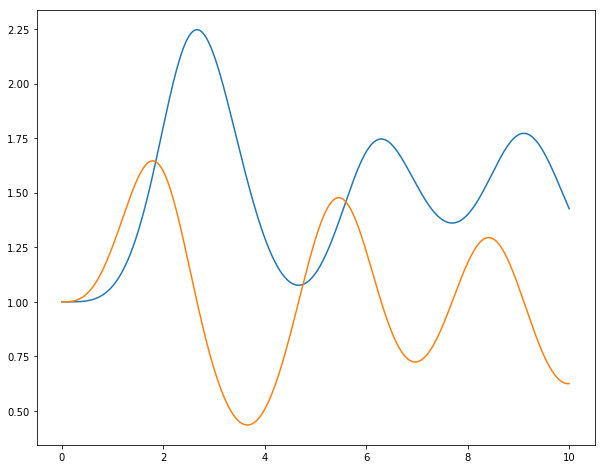

In [4]:
a = 0.0       
b = 10.0
h = 0.01
r0 = np.array([1.0, 1.0])
t, r = ode_runge_kutta_fourth_order_method(f, a, b, h, r0)

plt.figure(figsize=(10, 8))
plt.plot(t, r[0]) # the dependent variable x values are in r[0]
plt.plot(t, r[1]) # the dependent variable y values are in r[1]


# Lotka-Volterra Coupled System of ODE

Recall from Lecture 05 on sequences and difference equations, we briefly explored the Lotka-Volterra system
of coupled ordinary differential equations.  The equations express population sizes of two species in a
constrained environment, usually identified as a prey species $x$ and a predator species $y$ (such as rabbits
and foxes in some area).  The coupled ODE equations for the Lotka-Volterra model are:

$ \frac{dx}{dt} = x(\alpha - \beta y) $

$ \frac{dy}{dt} = -y(\gamma - \delta x) $

In that lecture notebook, we basically used a Euler approximation and gave an expression for a coupled 
system of recurrence relations in order to calculate the model dynamics.  Here we can use our developed
4th order Runge-Kutta method to more precisely calculates solutions of the coupled ODE equations.

One of the more interesting dynamics we modeled in Lecture 05 was shown with the following parameters
for the model

$\alpha = 0.04, \beta = 0.0005, \gamma = 0.04, \delta = 0.0001$

Lets create an ODE function and use our Runge-Kutta solver to model the same system as we did in Lecture 05
with these parameters.

In [5]:
def f(r, t):
    """A function representing a system of ordinary differential equations.  Instead of what we had previously, now 
    the first parameter r will be a NumPy array representing a vector of values.  Thus for a system of only two
    dependent variables, we simply use x = r[0] and y = r[1] from the vector.  A system of 1 variable, as we did in
    the previous lecture, can still use this new implementation, but of course the array will only have a single
    value x = r[0].  And of course, systems of 3 or more variables will use NumPy arrays of the appropriate size.
    
    In this function, we implement the system of 2 simulatenous ODE equations describing the
    Lotka-Volterra predator/prey population dynamics:
    
    dx/dt = x (alpha - beta * y),    dy/dt = -y (gamma - delta * x)  
    
    Parameters
    ----------
    r - A NumPy array, expected to be a vector
        A vector with two elements, representing the scalar values of the x and y dependent variables
    t - A scalar float
        The value of the independent variable t
        
    Returns
    -------
    numpy array - A vector of the same size/shape as r
        This function retuns the calculated rate of changes for the dx/dt and the dy/dt ODE equations as a vector
        of two scalar float values.
    """
    # for readability, x is expected to be passed in as r[0] and y is in r[1]
    x = r[0]
    y = r[1]
    # we hardcode the 4 Lotka-Volterra parameters here, but we could pass these in as additional parameters
    # of f() instead, with some modifications...
    alpha = 0.04
    beta = 0.0005
    gamma = 0.04
    delta = 0.0001
    
    dxdt = x * (alpha - beta * y)
    dydt = -y * (gamma - delta * x)
    
    return np.array([dxdt, dydt], float)

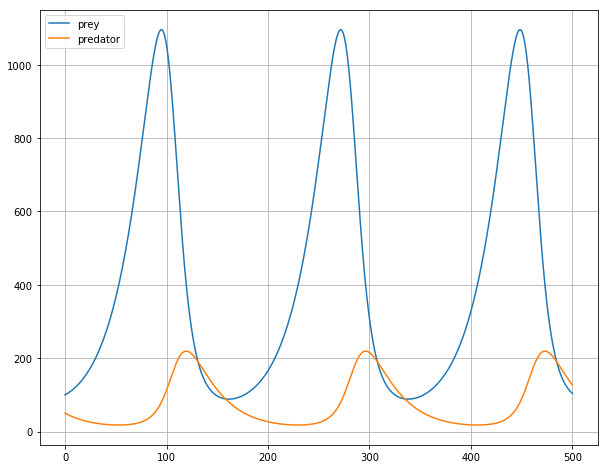

In [6]:
a = 0.0       
b = 500.0
h = 0.01
r0 = np.array([100.0, 50.0]) # initial conditions x[0] = 100.0 prey and y[0] = 50.0 predators
t, r = ode_runge_kutta_fourth_order_method(f, a, b, h, r0)

plt.figure(figsize=(10, 8))
plt.plot(t, r[0], label='prey') # the dependent variable x values are in r[0]
plt.plot(t, r[1], label='predator') # the dependent variable y values are in r[1]
plt.legend()
plt.grid()

Second-Order Differential Equations
-----------------------------------

So far we have looked at first-order differential equations, but first-order equations are in fact quite rare in scientific
computing.  Many, perhaps most, of the equations encountered are second-order or higher.  Luckily, now that we have seen
how to solve systems of first-order equations, solving second-order equations is pretty easy, because of the following trick.

Consider the first simple case where there is only one dependent variable $x$.  The general form of a second-order ordinary
differential equation with one dependent variable is:

$$
\frac{d^2x}{dt^2} = f \Big(x, \frac{dx}{dt}, t \Big)
$$

That is, the second derivative can be any arbitrary function, including possibly a nonlinear function, of $x$, $t$ and 
the derivative $dx/dt$.  So we could have, for instance:

$$
\frac{d^2x}{dt^2} = \frac{1}{x} \Big( \frac{dx}{dt} \Big)^2 + 2 \frac{dx}{dt} - x^3 e^{-4t}
$$

Now here's the trick.  We can always reduce the order of differential equations by introducing a new variable and turning
the higher-order equations into a system of simultaneous equations.  For example, for the previous second-order equation, 
we can introduce a new quantity $y$ defined as

$$
\frac{dx}{dt} = y
$$

Our general form, then, of a second order differential equation would then become a system of two equations:

$$
\frac{dx}{dt} = y
$$

$$
\frac{dy}{dt} = f(x, y, t)
$$

For example, for the specific second order equation we gave, using this substitution we end up with the set of equations:


$$
\frac{dx}{dt} = y
$$

$$
\frac{dy}{dt} = \frac{1}{x} \Big( y \Big)^2 + 2 y - x^3 e^{-4t}
$$

And now that we have reduced this a series of simultaneous first-order differential equations, we can simply use our already
developed method for approximating the solution to systems of such equations.

**Example: Nonlinear Pendulum**

A standard problem in Physics is the linear pendulum, where you approximate the behavior of a pendulum by a
linear differential equation that can be solved exactly.  But a real pendulum is nonlinear.  We consider a 
pendulum with a arm of length $l$ and a mass on the end of the pendulum of mas $m$.

In terms of the angle $\theta$ of displacement of the arm from the vertical, the accelaeration of the mass
is $l d^2\theta / dt^2$.  Meanwhile the force on the mass is vertically downward with a magnitude of $mg$ where
$g = 9.18 ms^-2$ is the acceleration due to gravity.  For the sake of simplicity we are ignoring friction and assume
the arm to be massless (thus only the mass on the end of the pendulum is considered, as a point mass).  The rest
point is defined as the angle $\theta = 0$.  We can use Newton's second law of gravity to give us an equation
of motion for the pendulum, which is a second-order ordinary differential equation:

$$
m l \frac{d^2 \theta}{dt^2} = - m g ~~ \mathrm{sin} ~ \theta
$$

which we can rearrange in standard form (and the mass thus disappears from the final form):

$$
\frac{d^2 \theta}{dt^2} = - \frac{g}{l} \mathrm{sin} ~ \theta
$$

Because it is nonlinear it is not easy to solve this equation analytically, and no exact solution is known.  But an
approximation on the computer is straightforward using the methods we have developed.  We first use the
trick to turn the second-order equation into a system of two first-order equations.  We define a new
variable $\omega$ by:

$$
\frac{d \theta}{dt} = \omega
$$

Then the second-order equation becomes:

$$
\frac{d \omega}{dt} = - \frac{g}{l} \mathrm{sin} ~ \theta
$$

Between them these two first-order equations are equivalent to the one second-order equation we started with.  Now we 
combine the two variables $\theta$ and $\omega$ into a single vector $\mathbf{r} = (\theta, \omega)$ and apply
the fourth-order Runge-Kutta approximation method in vector form to solve the two equations simultaneously.

To solve this, we simply need to define an approriate `f(r, t)` Python function for this system of equations.

In [7]:
# some global constants
def f(r, t):
    """A function representing a system of ordinary differential equations.  
    
    In this function, we implement the system of 2 simulatenous ODE equations for the nonlinear pendulum
    
    d0/dt = w,    dw/dt = - g / l sin 0
    
    Parameters
    ----------
    r - A NumPy array, expected to be a vector
        A vector with two elements, representing the scalar values of the 0 and w dependent variables
    t - A scalar float
        The value of the independent variable t
        
    Returns
    -------
    numpy array - A vector of the same size/shape as r
        This function retuns the calculated rate of changes for the d0/dt and the dw/dt ODE equations as a vector
        of two scalar float values.
    """
    # define these as constants in the function for now
    l = 0.1
    g = 9.81
    
    # for readability, theta is expected to be passed in as r[0] and omega is in r[1]
    theta = r[0]
    omega = r[1]
    
    dtheta = omega
    domega = -(g / l) * np.sin(theta)
    
    return np.array([dtheta, domega], float)    

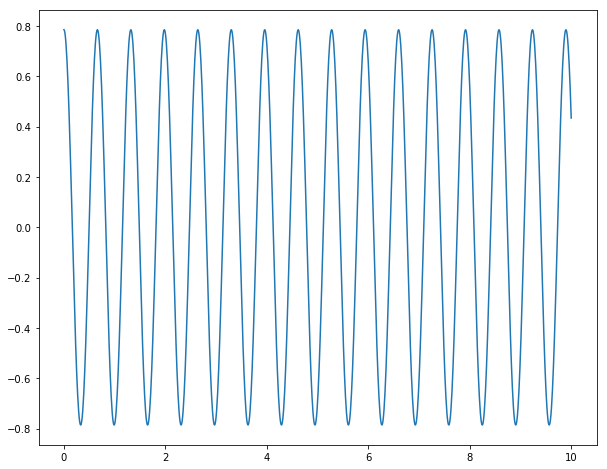

In [8]:
# simulate for time from 0 to 10
a = 0.0       
b = 10.0
h = 0.01
# initial theta = 45 degrees e.g. pi/4
# initial acceleration is 0
r0 = np.array([np.pi/4.0, 0.0]) 
t, r = ode_runge_kutta_fourth_order_method(f, a, b, h, r0)

# visualize the angle made by the pendulum, theta, as a function of time
plt.figure(figsize=(10, 8))
plt.plot(t, r[0]) # the dependent variable theta values are in r[0]


# Versions

In [9]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.13 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
Mon Feb 19 11:27:02 2018 CST

Acknowledgement
----------------

The content of this notebook are based upon and borrowed heavily from Newman "Computational Physics" Chapter 8.